### 1. Plot two clusters of points for training dateset

- Generate two sets of separable random point clusters in $`\mathbb{R}^2`$

In [24]:
import numpy as np

cluster1_center = 10
cluster2_center = 70

cluster1_distance = 15
cluster2_distance = 20

cluster1_x_points = np.random.normal(cluster1_center, cluster1_distance, 100)
cluster1_y_points = np.zeros(100)

cluster2_x_points = np.random.normal(cluster2_center, cluster2_distance, 100)
cluster2_y_points = np.ones(100)

- Let $`\{ x_i \}_{i=1}^n`$ be a set of points and $`\{ y_i \}_{i=1}^n`$ be their corresponding labels

In [25]:
x_train = np.concatenate((cluster1_x_points, cluster2_x_points))
y_train = np.concatenate((cluster1_y_points, cluster2_y_points))

- Plot the point clusters in the training dataset using different colors depending on their labels

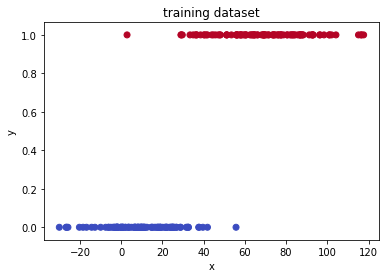

In [26]:
import matplotlib.pyplot as plt

plt.title('training dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train, c=y_train, cmap='coolwarm')
plt.show()

### 2. Plot two clusters of points for testing dataset

- Generate two sets of separable random point clusters in $`\mathbb{R}^2`$ for a testing dataset using the same centroid and the standard deviation of random generator as the training dataset

In [27]:
cluster1_x_points = np.random.normal(cluster1_center, cluster1_distance, 100)
cluster1_y_points = np.zeros(100)

cluster2_x_points = np.random.normal(cluster2_center, cluster2_distance, 100)
cluster2_y_points = np.ones(100)

x_test = np.concatenate((cluster1_x_points, cluster2_x_points))
y_test = np.concatenate((cluster1_y_points, cluster2_y_points))


- Plot the point clusters in the testing dataset using different colors depending on their labels (different colors from the training dataset)


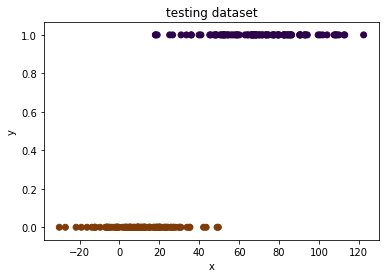

In [28]:
plt.title('testing dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test, y_test, c=y_test, cmap='PuOr')
plt.show()
